<h1 style="color:rgb(0,120,170)">Assignment 2: Gaussian Classifier, Bias-Variance Decomposition, Evaluation </h1>

<h2 style="color:rgb(0,120,170)">Task 1: Gaussian classifier: visualization & parameter estimation</h2>

* Visualize the data stored in `Normal.csv` with two different colors. Always label the axes of all your plots.
* We assume that the data are distributed according to a two-dimensional multivariate normal distribution. Estimate the means and covariance matrices as well as $p(y=+1)$ and $p(y=-1)$
from the data and print your results.

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import random

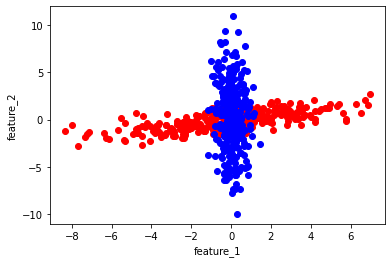

p(y = +1) = 0.5
estimated means matrix for label +1: [-0.14820707 -0.03790113]

calculated covariance matrix: 
[[8.41412636 2.01108897]
 [2.01108897 0.95014842]]

p(y = -1) = 0.5
estimated means matrix for label -1: [0.0340324  0.16727881]

calculated covariance matrix: 
[[ 0.19794512 -0.16052663]
 [-0.16052663 12.51152132]]



In [9]:
# read data, split into X (features) and y (labels)
Z = np.genfromtxt('normal.csv', delimiter=',')
X_features, y_label = Z[:,:-1], Z[:,-1]

# your code here:
counter_plus = 0
counter_minus = 0
sum_plus = 0
sum_minus = 0
el = 0

list1 = []
list2 = []
list3 = []
list4 = []

list_plus = []
list_minus = []

for index, single_value in enumerate(X_features):
    #print(single_value)
    if y_label[index] == 1:
        colour = 'red'
        sum_plus += single_value
        counter_plus += 1
        
        list1.append(single_value[0])
        list2.append(single_value[1])
        
        list_plus.append(single_value)
        
    elif y_label[index] == -1:
        colour = 'blue'
        sum_minus += single_value
        counter_minus += 1

        list3.append(single_value[0])
        list4.append(single_value[1])
        
        list_minus.append(single_value)
        
    else:
        colour = 'green'
        
    plt.scatter(single_value[0],single_value[1], c=colour)
    
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()

# Estimations:
arr = np.array([list1, list2])
covariance_matrix_plus = np.cov(arr, bias=True)

mean_matrix_plus = sum_plus/counter_plus
prob_y_plus = (counter_plus)/len(y_label)
print('p(y = +1) =', prob_y_plus)
print(f'estimated means matrix for label +1: {mean_matrix_plus}')
print(f"""
calculated covariance matrix: 
{covariance_matrix_plus}
""")

arr2 = np.array([list3, list4])
covariance_matrix_minus = np.cov(arr2, bias=True)

mean_matrix_minus = sum_minus/counter_minus
prob_y_minus = (counter_minus)/len(y_label)
print('p(y = -1) =', prob_y_minus)
print(f'estimated means matrix for label -1: {mean_matrix_minus}') 
print(f"""
calculated covariance matrix: 
{covariance_matrix_minus}
""") 



correction marks:
postive_X = X[y==1] # get numpy array <br>
get mean: 
np.mean(positive_x.T, axis=1)

<h2 style="color:rgb(0,120,170)">Task 2: Gaussian classifier: compute classifier & visualization</h2>

* Compute an optimal classification function $g$ (see slide 17 from lectures Unit 2) by calculating the values of the corresponding parameters $\mathbf{A}$, $\mathbf{b}$ and $c$. Print the solutions. 
* Visualize the classification function and the decision boundaries in a two-dimensional plot.


<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

In [3]:
# your code here:
from numpy import asarray

det_plus = covariance_matrix_plus[0][0] * covariance_matrix_plus[1][1] - covariance_matrix_plus[0][1] * covariance_matrix_plus[1][0]
det_minus = covariance_matrix_minus[0][0] * covariance_matrix_minus[1][1] - covariance_matrix_minus[0][1] * covariance_matrix_minus[1][0]

A = np.linalg.inv(covariance_matrix_plus) - np.linalg.inv(covariance_matrix_minus) 

b = np.matmul(mean_matrix_plus, np.linalg.inv(covariance_matrix_plus)) - np.matmul(mean_matrix_minus, np.linalg.inv(covariance_matrix_minus))
# np.matmul() is a special function for matrix multiplication

c = -0.5 * np.matmul(np.matmul(mean_matrix_plus, np.linalg.inv(covariance_matrix_plus)), mean_matrix_plus.transpose()) \
+ 0.5 * np.matmul(np.matmul(mean_matrix_minus,np.linalg.inv(covariance_matrix_minus)), mean_matrix_minus.transpose()) \
- 0.5 * np.log(det_plus) \
+ 0.5 * np.log(det_minus) \
+ np.log(prob_y_plus) \
- np.log(prob_y_minus)

print(f'A = {A}')
print(f'b = {b}')
print(f'c = {c}')

A = [[-4.86449046 -0.57461096]
 [-0.57461096  2.0492894 ]]
b = [-0.20104545 -0.02101719]
c = -0.2355219157294558


In [4]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show, subplots, xlim, ylim
""" Ignore that box!
# This function shall be plotted:
def g_opt(x,y, A, b, c):
    
    empty_array = np.zeros(x.shape)      
    for index, line in enumerate(x):
        for index_two, single_number in enumerate(line):
            s = np.asarray([x[index][index_two], y[index][index_two]])
            g_est = -0.5 * np.matmul(np.matmul(s,A), s.transpose()) + np.matmul(b, s.transpose()) + c
            if g_est >= 0:
                predicted_label = 1
            elif g_est < 0:
                predicted_label = -1
            else:
                print('error')
            empty_array[index][index_two] = predicted_label
    return empty_array


min1, max1 = X_features[:, 0].min()-1, X_features[:, 0].max()+1 
min2, max2 = X_features[:, 1].min()-1, X_features[:, 1].max()+1
x_ax = arange(-3.0,3.0,0.1)
y_ax = arange(-3.0,3.0,0.1)
#plt.xlim(-10,10)
#plt.ylim(-10,10)
X_ax,Y_ax = meshgrid(x_ax, y_ax) # grid of point

Z = g_opt(X_ax,Y_ax, A, b, c) # evaluation of the function on the grid
im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=1,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
title('Decision boundaries of the optimal function')

plt.show()
"""

" Ignore that box!\n# This function shall be plotted:\ndef g_opt(x,y, A, b, c):\n    \n    empty_array = np.zeros(x.shape)      \n    for index, line in enumerate(x):\n        for index_two, single_number in enumerate(line):\n            s = np.asarray([x[index][index_two], y[index][index_two]])\n            g_est = -0.5 * np.matmul(np.matmul(s,A), s.transpose()) + np.matmul(b, s.transpose()) + c\n            if g_est >= 0:\n                predicted_label = 1\n            elif g_est < 0:\n                predicted_label = -1\n            else:\n                print('error')\n            empty_array[index][index_two] = predicted_label\n    return empty_array\n\n\nmin1, max1 = X_features[:, 0].min()-1, X_features[:, 0].max()+1 \nmin2, max2 = X_features[:, 1].min()-1, X_features[:, 1].max()+1\nx_ax = arange(-3.0,3.0,0.1)\ny_ax = arange(-3.0,3.0,0.1)\n#plt.xlim(-10,10)\n#plt.ylim(-10,10)\nX_ax,Y_ax = meshgrid(x_ax, y_ax) # grid of point\n\nZ = g_opt(X_ax,Y_ax, A, b, c) # evaluation of th

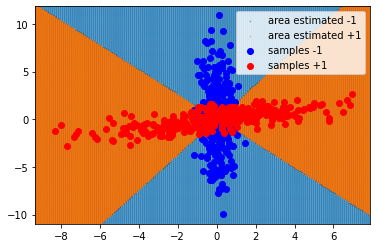

In [12]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show, subplots, xlim, ylim

# This function shall be plotted:
def g_opt(x, A, b, c):
    liste = []
    for e in x:
        g_est = -0.5 * np.matmul(np.matmul(e,A), e.transpose()) + np.matmul(b, e.transpose()) + c
        if g_est >= 0:
            predicted_label = 1
            liste.append(predicted_label)
        elif g_est < 0:
            predicted_label = -1
            liste.append(predicted_label)
        else:
            print('error')
    return np.asarray(liste)


min1, max1 = X_features[:, 0].min()-1, X_features[:, 0].max()+1 
min2, max2 = X_features[:, 1].min()-1, X_features[:, 1].max()+1

x1grid = arange(min1,max1,0.1)
x2grid = arange(min2,max2,0.1)
xx, yy = np.meshgrid(x1grid, x2grid) 
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))

yhat =  g_opt(grid, A, b, c)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(xx, yy, yhat<0, label='area estimated -1',alpha=0.5) # correcture
plt.scatter(xx, yy, yhat>=0, label='area estimated +1',alpha=0.5) # correcture
for class_value in [-1,1]:
    row_ix = np.where(y_label == class_value)
    if class_value == 1:
        colour = 'red'
        lab = 'samples +1' # correcture
    elif class_value == -1:
        colour = 'blue'
        lab = 'samples -1' # correcture
    plt.scatter(X_features[row_ix, 0], X_features[row_ix, 1], cmap='Paired', c=colour, label = lab)
plt.legend() # correcture

<h2 style="color:rgb(0,120,170)">Task 3: Details for bias-variance decomposition for quadratic loss </h2>

Also an explicit formula of the bias variance decomposition for the quadratic loss was mentioned in the lecture. In this task, you will be asked to fill in some details that haven't been discussed there. To this end, let us introduce some notation:

$Z_l$ denotes a data matrix of $l$ elements from our data set $Z =(X,\mathbf{y})$ with $X$ the feature matrix and $\mathbf{y}$ the label vector. $g(\mathbf{x}_0;\mathbf{w}(Z_l)))$ denotes the model, with a parameter vector $\mathbf{w}(Z_l)$ originating from $Z_l$, and $y$ is the label corresponding to a feature vector $\mathbf{x}_0$. 

Our object of interest is the expected prediction error (EPE) for
$\mathbf{x}_0\in X$ in case of the quadratic loss, i.e.:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big(L_{\mathbf{q}}(y,g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)
= \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)$$

We assume that $y\mid\mathbf{x}_0$ and the selection of training samples $Z_l$ are
independent which results in the following reformulation of the total expected prediction error:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0}\Big(\mathrm{E}_{Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)\Big)$$

Show that we can obtain the following bias-variance decomposition:

\begin{align*}
\mathrm{EPE}(\mathbf{x}_0)=&\,\operatorname{Var}(y\mid\mathbf{x}_0)\\
&+\Big(\mathrm{E}_{y\mid\mathbf{x}_0}(y)-E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big)\Big)^2\\
&+\mathrm{E}_{Z_l}\Big(\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))-E_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)^2\Big)
\end{align*}
Hints: 
* Expand the square in the quardratic loss and the expressions from the three parts of the decompositon you want to obtain.
* Find a way to match those expressions.
* It might be useful to recall that $\mathrm{E}(\mathrm{E}(v))=\mathrm{E}(v)$ for any random variable $v$.

For your calculation please use the given notation.

<h3 style="color:rgb(210,90,80)">Calculation (15 points):</h3>
Insert your calculation here, please use LaTex

Task 3:
\begin{align*}
  EPE(x_0) &= Var(y|x_0) + (E_{y|x_o}(y) - E_{Z_l}(g(x_0;w(Z_l))))^2 + (E_{Z_l}((g(x_0;w(Z_l)) - E_{Z_l}(g(x_0;w(Z_l))))^2)\\
              & \\
           &= E_{y|x_0}((y - E_{Z_l}(g(x_0;w(Z_l))))^2) \\
              &+ (E_{y|x_o}(y) - E_{Z_l}(g(x_0;w(Z_l))))^2 \\
              &+ (E_{Z_l}((g(x_0;w(Z_l)) - E_{Z_l}(g(x_0;w(Z_l))))^2)\\
              & \\
           &= E_{y|x_0}(y^2 - 2yE_{Z_l}(g(x_0;w(Z_l))) + E_{Z_l}(g(x_0;w(Z_l)))^2) \\
              &+ E_{y|x_0}(y)^2 - 2 * E_{y|x_0}(y) * E_{Z_l}(g(x_0;w(Z_l))) + E_{Z_l}(g(x_0;w(Z_l))^2 \\
              &+ E_{Z_l}(g(x_0;w(Z_l))^2 - 2 * g(x_0,w(Z_l)) * E_{Z_l}(g(x_0,w(Z_l))) + E_{Z_l}(g(x_0;w(Z_l)))^2) \\
           & \\
           &= E_{Z_l}(g(x_0;w(Z_l))^2) - E_{Z_l}(2 * g(x_0;w(Z_l)) * E_{Z_l}(g(x_0;w(Z_l)))) + E_{Z_l}(E_{Z_l}(g(x_0;w(Z_l)))^2) \\
           &= E_{y|x_0}(y)^2 - 2 * E_{y|x_0}(y) * E_{Z_l}(g(x_0;w(Z_l))) + E_{Z_l}(g(x_0;w(Z_l)))^2 \\
           &= E_{y|x_0}(y^2) - 2 * E_{y|x_0}(y * E_{Z_l}(g(x_0;w(Z_l))) + E_{Z_l}(g(x_0;w(Z_l))^2) \\
	   & \\
	   &= 2 * E_{Z_l}(g(x_0;w(Z_l))^2) + 2 * E_{Z_l}(g(x_0;w(Z_l)))^2 + E_{y|x_0}(y^2) + E_{y|x_0}(y)^2 \\
           &- 4 * E_{y|x_0}(y) * E_{Z_l}(g(x_0;w(Z_l))) - 2 * E_{Z_l}(g(x_0;w(Z_l)) * E_{Z_l}(g(x_0;w(Z_l)))) \\
	   & \\
	   &= 2 * E_{Z_l}(g(x_0;w(Z_l))^2) + 2 * E_{Z_l}(g(x_0;w(Z_l)))^2 + E_{y|x_0}(y^2) + E_{y|x_0}(y)^2 \\
           &- 4 * E_{y|x_0}(y) * E_{Z_l}(g(x_0;w(Z_l))) - 2 * E_{Z_l}(g(x_0;w(Z_l)^2) \\
	   & \\
	   &= 2 * E_{Z_l}(g(x_0;w(Z_l)))^2 + E_{y|x_0}(y^2) + E_{y|x_0}(y)^2 - 4 * E_{y|x_0}(y^2) * E_{Z_l}(g(x_0;w(Z_l))) \\
	   & \\
	   &= 2 * E_{Z_l}(g(x_0;w(Z_l)))^2 + 2 * E_{y|x_0}(y)^2 - 4 * E_{y|x_0}(y^2) * E_{Z_l}(g(x_0;w(Z_l))) \\
	   & \\
	   &= 2 * (E_{y|x_0}(y)^2 - 2 * E_{y|x_0}(y^2) * E_{Z_l}(g(x_0;w(Z_l))) + E_{Z_l}(g(x_0;w(Z_l)))^2) \\
	   & \\
	   &= 2 * ((E_{y|x_0}(y) - E_{Z_l}(g(x_0;w(Z_l))))^2)\\
	   & \\
	   &= 2 * E_{x_0|y,Z_l}((y - (g(x_0;w(Z_l))))^2)  --> formula from UE A2_{slides} 
\end{align*}


# <h2 style="color:rgb(0,120,170)">Task 4: Bias-variance decomposition for regression </h2>

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

Consider the following one-dimensional regression task: inputs $x$ are
uniformly distributed in $[−1, 3] \subset \mathbb{R}$ and targets $y$ are given as

\begin{align*}
f(x) &= 0.6\,x^4 + 2\,x^3 - 8\,x^2 \\
y &= f(x) + \varepsilon,
\end{align*}

where $\varepsilon$ is independent normally distributied noise with $\mu=0$ and $\sigma^2 = 0.09$. 

* What are $E(y \mid x_0)$ and the unavoidable error $\operatorname{Var}(y \mid x_0)$ for a fixed $x_0$ in this setting?

Tick the correct box:

\[ X\]  $E(y \mid x_0) = 0.6x_0^4 + 2x_0^3 - 8x_0^2 \text{ and }\operatorname{Var}(y \mid x_0) = \sigma^2$. <br>
\[  \]   $E(y \mid x_0) = 0.6\sigma^4 + 2\sigma^3 - 8\sigma^2 \text{    and    } \operatorname{Var}(y \mid x_0) = x_0^2$. <br>
\[ \]   $E(y \mid x_0) = 0 \text{ and }  \operatorname{Var}(y \mid x_0) = \sigma^2$. <br>
\[  \]   $E(y \mid x_0) = 0.6x_0^4 + 2x_0^3 - 8x_0^2 \text{    and    } \operatorname{Var}(y \mid x_0) = 0.6x_0^4 + 2x_0^3 - 8x_0^2+\sigma^2$.<br>


We intend to perform polynomial regression to illustrate the bias-variance decomposition for the regression task described before. To this end, perform the following steps.
 * Create $k=200$ training sets with $l=20$ samples each.
 * Below, we provide the code for a function that trains a polynomial regression model with degree $m$ on a given training set and returns the prediction for a given test set.
 Use this function to produce <em>one</em> plot that simultaneously visualizes the training data as dots (plot only the <em>first</em> instance of each of the $k$ training sets) and the corresponding models for $m=1,4,11$. Don't forget to label the axes.
 * For each degree $m=1,...,11$ estimate the squared bias and the variance from the predictions for each of the $k=200$ training sets at $x_0=1.8$ and store them in the lists sqbias and variance (which are already initiated as empty lists). Each of the lists should then only contain $11$ elements. Print these lists. Finally visualize your results in <em>one</em> plot where the dependence of the variance and squared bias versus $m$ is shown. Again, the axes should be labeled apporopriately.

<h3 style="color:rgb(210,90,80)">Code (30 points):</h3>

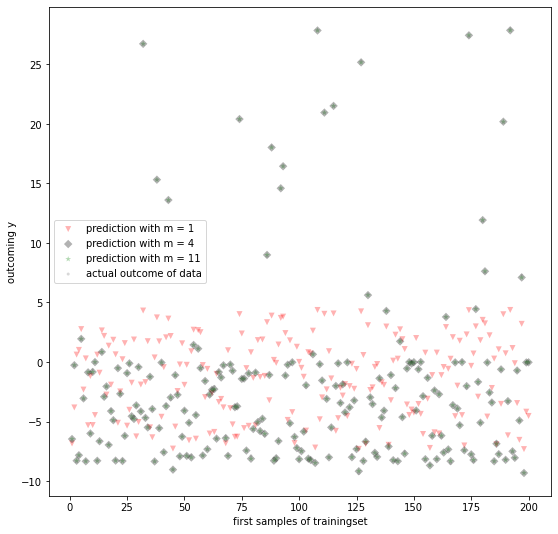

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#some code that should help you

np.random.seed(14)
x0 = np.array([1.8])
sqbias = []
variance = []

def pol_reg_pred(X_train,y_train,X_test,m):
    poly_reg = PolynomialFeatures(m)
    X_poly_train = poly_reg.fit_transform(X_train.reshape(-1, 1))
    X_poly_test= poly_reg.fit_transform(X_test.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_pred = lin_reg.predict(X_poly_test)
    return y_pred

# your code here:

# Create 𝑘=200 training sets with 𝑙=20 samples each: 


# generate dataframe
# one columns schall be one trainingset
import random
first_col = []

dic = {}
for i in range(20):
    mu = 0
    sigma = (0.09)
    noise = np.random.normal(mu, sigma)
    random_number = random.uniform(-1,3)
    math_out = 0.6 * random_number**4 + 2 * random_number**3 - 8 * random_number**2 + noise
    t = random_number, math_out
    first_col.append(tuple(t))
#
df = pd.DataFrame(data=(first_col), columns = ('a','b'))
dic_list_nested = []
dic_list_nested_y = []
dic_list_y = []
inner_y = []
list_test = []
inner_list = []
list_test_real_values = []
for i in range(200):
    buffer_list = []
    inner_list_nested = []
    inner_list_nested_y = []
    for ran in range(20):

        noise = np.random.normal(mu, sigma)
        random_number = random.uniform(-1,3)
        math_out = 0.6 * random_number**4 + 2 * random_number**3 - 8 * random_number**2 + noise
        
        
        inner_list.append(random_number)
        inner_list_nested.append(random_number)
        inner_list_nested_y.append(math_out)
        inner_y.append(math_out)
        
                
        if ran == 0: # the first sample in a trainingset
            list_test.append(random_number)
            list_test_real_values.append(math_out)
        
    dic_list_nested.append(inner_list_nested)
    dic_list_nested_y.append(inner_list_nested_y)
    dic_list_y.append(inner_y)
  #  df[f'{i}'] = pd.Series(buffer_list, index=df.index)
dic['all_samples'] = np.asarray(inner_list)
dic['all_ys'] = np.asarray(inner_y)
dic['to_test'] = np.asarray(list_test)
dic['nested_samples'] = np.asarray(dic_list_nested)
dic['nested_y'] = np.asarray(dic_list_nested_y)
# now plot the results:
plt.figure(figsize=(9, 9))
x_list = []
for i in range(0,200):
    x_list.append(i+1)

for m in [1,4,11]:
    predictions = pol_reg_pred(dic['all_samples'], dic['all_ys'], dic['to_test'], m)
    if m == 1:
        colour = 'red'
        marker = 'v'
    elif m == 4:
        colour = 'black'
        marker = 'D'
    else:
        colour = 'green'
        marker = '*'
    
    plt.scatter(x_list, predictions, c=colour, label=f"prediction with m = {m}", alpha=0.3, edgecolors='none',
               marker=marker)
    


plt.scatter(x_list,list_test_real_values, c='grey', label='actual outcome of data', alpha=0.3, edgecolors='none',
           marker='.')


plt.legend()
plt.ylabel('outcoming y')
plt.xlabel('first samples of trainingset')

plt.show()

Partwise the points are overlapping. 

variance list: [array([6.92015163]), array([2.47936367]), array([0.10808757]), array([0.00232365]), array([0.00513886]), array([0.0097352]), array([0.01172977]), array([0.00631236]), array([0.05162586]), array([0.20063472]), array([0.50172273])]
squared bias list: [array([77.84928053]), array([38.83448486]), array([0.0342185]), array([0.00550601]), array([0.005495]), array([0.0052392]), array([0.00523805]), array([0.0051988]), array([0.00527932]), array([0.00521885]), array([0.00532434])]


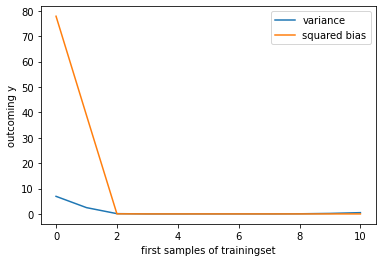

In [7]:

np.random.seed(14)
# calculate the actual value of x0 = 1.8 without the noise and therefor unavoidable variance:
variance = [] 
sqbias = []
fourth = [] # delete
math_out_sample = 0.6 * 1.8**4 + 2 * 1.8**3 - 8 * 1.8**2 + noise

for m in range(1,12):
    # prediction of the model which is fed with all trainingsets, 1.8 shall get an value:
    prediction = pol_reg_pred(dic['all_samples'], dic['all_ys'],np.asarray([1.8]), m)
    bias_squared = (math_out_sample - prediction)**2
    sqbias.append(bias_squared)

    
    

    sum_pre = 0
    counter = 0
    pred_per_set = []
    for index,one_trainingset in enumerate(dic['nested_samples']): # one nested list is one trainingset
     
        

        # calculate prediction for each single trainingset
        prediction_raw = pol_reg_pred(one_trainingset, dic['nested_y'][index],np.asarray([1.8]), m)
        sum_pre += prediction_raw 
        counter += 1
        pred_per_set.append(prediction_raw)
        


    estimated_mean = sum_pre/counter # mean over all trainingsets
    sum_var = 0
    for single_prediction_for_one_set in pred_per_set:
        value = (single_prediction_for_one_set - estimated_mean)**2
        sum_var += value
    model_variance = sum_var/(len(pred_per_set)-1)
    variance.append(model_variance)

print('variance list:', variance)
print('squared bias list:', sqbias)
    
# plot squared bias and variance:
liste = []
for i in range(1,12):
    liste.append(i)
#plt.scatter(liste,variance, c='grey', label='actual outcome of data', alpha=0.3, edgecolors='none',
 #          marker='.')
#plt.scatter(liste,sqbias, c='grey', label='actual outcome of data', alpha=0.3, edgecolors='none',
  #         marker='.')
#plt.plot(variance, label='variance') 
plt.plot(variance, label='variance') 
plt.plot(sqbias, label='squared bias')
plt.legend()
plt.ylabel('outcoming y')
plt.xlabel('first samples of trainingset')


plt.show()


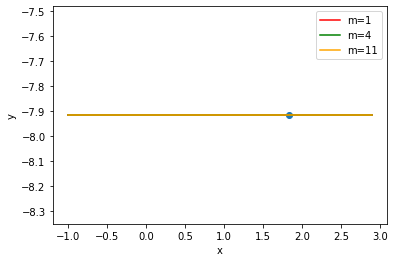

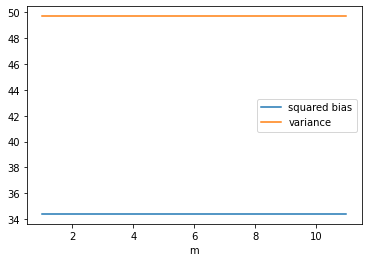

In [30]:
#correction:

def f(l):
    return 0.6 * l**4 + 2 * l**3 - 8 * l**2 

l = 20
k = 200
X_train = np.random.uniform(low=-1, high=3, size=(k,1))
y_train = f(X_train) + np.random.normal(loc=0.,scale=0.3,size=(k,1))

plt.scatter(X_train[0], y_train[0]);
x_ = np.arange(-1,3,0.1)
plt.plot(x_, pol_reg_pred(X_train[0], y_train[0], x_,1), color='red', label='m=1')
plt.plot(x_, pol_reg_pred(X_train[0], y_train[0], x_,4), color='green', label='m=4')
plt.plot(x_, pol_reg_pred(X_train[0], y_train[0], x_,11), color='orange', label='m=11')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# second part correction:
sqbias = []
variance = []
f_hat = np.zeros(k)
M = list(range(1,12))
for m in M:
    for i in range(k):
        f_hat[i] = pol_reg_pred(X_train[i],y_train[i],x0,m)
    sqbias.append(np.mean(f_hat-f(x0))**2)
    variance.append(np.var(f_hat))
plt.plot(M, sqbias, label='squared bias')
plt.plot(M, variance, label='variance')
plt.legend()
plt.xlabel('m')
plt.show()

<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

If you did the previous task correctly, the resulting plot should look like this:
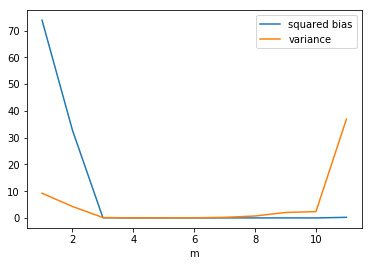    


What observations can you make from this plot? Tick the correct boxes (several may be correct):


\[ X \]   For appropriate complexity, i.e. $3 \leq m < 7$, both model variance and bias are low, which indicates good generalization abilities. <br>
\[  \] The variance is lowest for models which are too simple, i.e. $m<3$.<br>
\[  \]   As the model becomes too complex, i.e. $m \geq 7$, the variance increases again while the bias still decreases. This is an indication for underfitting.<br>
\[X \] For models with $m \geq 7$, the bias is still low (i.e. close to $0$) because the independent noise has zero mean and high individual biases cancel in expectation. <br>
\[  \]  For models with $m \geq 7$, the variance is high (i.e. significantly larger than $0$) because the independent noise has zero mean and high individual biases cancel in expectation. <br>

<h2 style="color:rgb(0,120,170)">Task 5: Evaluation Metrics for imbalanced Data Sets </h2>

Consider a classifier with discriminant function $\bar g$.
For a given labeled data set, the following results are obtained:
$$\begin{array}{|r|r|}
\hline
y & \bar g(x)\\
\hline \hline
 +1 & 0.93 \\
 +1 & 0.55 \\
 +1 & 0.48 \\
 +1 & 0.13 \\
 -1 & 0.02 \\
 +1 & -0.11 \\
 -1 & -0.25 \\
 +1 & -0.39 \\
 -1 & -0.41 \\
 -1 & -1.68 \\
 -1 & -2.23 \\
\hline
\end{array}$$

Compute the confusion table using the usual zero threshold.
Calculate the following evaluation measures:
ACC, TPR, TNR, FPR, FNR, PREC, and $F_1$.
Computations should be done by hand and in sufficient detail (but you can use software
to validate your results).

<h3 style="color:rgb(210,90,80)">Calculation (8 points):</h3>

* Confusion Matrix: Assume that the rows correspond to $g(x)$, the columns to the true labels $y$.

$$
\begin{array}{|r|r|r|}
\hline
 &\bar g(x)=+1  & \bar g(x)=-1\\
 \hline 
 y=+1 & 4 & 2\\
 \hline
 y=-1 & 1 & 4\\
\hline
\end{array}
$$

* ACC:(TP + TN)/(TP + TN + FP + FN) = 8/11

* TPR:TP/P = 4/6 = 2/3

* TNR:TN/N = 4/5

* FPR:FP/N = 1/5

* FNR:FN/P = 2/6 = 1/3

* PREC:TP/(TP+FP) = 4/5

* BACC:(TPR+TNR)/2 = (2/3 + 4/5)/2 = 11/15

* F1:2*(PREC*TPR)/(PREC+TPR) = 2*(4/5 * 2/3)/(4/5 + 2/3) = 8/11


Let's say we have a population of 1000 people and we know that 50 are infected with the corona virus.
* Assume that the population is tested with an assay that has specificity of $99.8 \%$ and sensitivity of $100 \%$. What is the probability that a person isn't infected if it is diagnosed as ill by the test?
* Do the same task if the assay has specificity of $96 \%$.

<h3 style="color:rgb(210,90,80)">Calculation (7 points):</h3>
Insert your calculation here, please use LaTex

First task:
\begin{align*}
  TNR &= \frac{TN}{TN+FP}\\
      &= \frac{TN}{N}\\
  0.998&= \frac{TN}{950}\\
  TN &= 948.1 \\
  &  \\
  FP &= N - TN\\
     &= 950 - 948.1
     &= 1.9\\
  & \\
  FPR &= \frac{FP}{N}\\
      &= \frac{1.9}{950}\\
      &= 0.00200\\
      &= 0.20 \%\\
\end{align*}

Second task:
\begin{align*}
  TNR &= \frac{TN}{TN+FP}\\
      &= \frac{TN}{N}\\
  0.96&= \frac{TN}{950}\\
  TN &= 912 \\
  &  \\
  FP &= N - TN\\
     &= 950 - 912\\
     &= 38\\
  & \\
  FPR &= \frac{FP}{N}\\
      &= \frac{38}{950}\\
      &= \frac{1}{25}\\
      &= 0.0400\\
      &= 4.00 \%\\
\end{align*}


Correction:
TN = N*TNR=950*0.99=948.1, FP=N-TN=1.9,TP=P=50(sensitivity of 100%). PREC=TP/(TP+FP)=0.963. 1 - PREC = 0.037. Second: 0.432
FPR: 1-PREC is predicted 'incorrectly' positive from all the one that are positive by 'model' TP+FP; The FPR is predicted 'incorrectly' positive from all the real NEGATIVES TN + FP